# How to apply Bayesian vector autoregression to multivariate time series prediction?

Author: Xinyu Chen (陈新宇, mail to: chenxy346@mail2.sysu.edu.cn)

**About this notebook**:

> This notebook is aimed to introduce an unfamiliar reader to Bayesian modeling for vector autoregressive time series. We will discuss the basics of autoregressive models, use the Gaussian-Wishart distribution as a conjugate prior for posterior inference, and give an intuitive example of using this model for spatiotemporal multivariate time series prediction.

**Reference**:

- Sune Karlsson, 2012. [Forecasting with Bayesian Vector Autoregressions](https://www.oru.se/globalassets/oru-sv/institutioner/hh/workingpapers/workingpapers2012/wp-12-2012.pdf).

**Quick run**:

This notebook is publicly available for any usage at our data imputation project. Please click [**transdim**](https://github.com/xinychen/transdim).


## 1 Vector autoregression (VAR) model

Vector autoregession (VAR) model is a type of time series model that describes the joint dynamics of multivariate time series data. Let $\boldsymbol{x}_{t}$ be a $R\times 1$ vector (time series variables) that takes values in $\mathbb{R}^{R}$, the temporal evolution of $\boldsymbol{x}_{t}$ can be described by the VAR(d):

$$\boldsymbol{x}_{t}=A_{1} \boldsymbol{x}_{t-h_1}+\cdots+A_{d}\boldsymbol{x}_{t-h_d}+\boldsymbol{\epsilon}_{t},~t=h_d+1,...,T,$$
where $d$ denotes the order of vector autoregressions. $A_{k}\in\mathbb{R}^{R\times R}$ are coefficient matrices and $\boldsymbol{\epsilon}_{t}\in\mathbb{R}^{R}$ is an unobservable zero mean white noise vector (with time invariant covariance matrix $\Lambda$).

For example, a bivariate VAR(2) model (e.g., time lags are $\left\{1,2\right\}$) has the form:

$$\begin{aligned}\left[\begin{array}{l}{x_{1 t}} \\ {x_{2 t}}\end{array}\right]=&+\left[\begin{array}{cc}{a_{11}^{(1)}} & {a_{12}^{(1)}} \\ {a_{21}^{(1)}} & {a_{22}^{(1)}}\end{array}\right]\left[\begin{array}{l}{x_{1 t-1}} \\ {x_{2 t-1}}\end{array}\right] +\left[\begin{array}{cc}{a_{11}^{(2)}} & {a_{12}^{(2)}} \\ {a_{21}^{(2)}} & {a_{22}^{(2)}}\end{array}\right]\left[\begin{array}{l}{x_{1 t-2}} \\ {x_{2 t-2}}\end{array}\right]+\left[\begin{array}{c}{\varepsilon_{1 t}} \\ {\varepsilon_{2 t}}\end{array}\right] \end{aligned}.$$

For better understanding vector autoregressions, we could rewrite the VAR(d) as the following form:

$$\boldsymbol{x}_{t}=A^\top{\boldsymbol{z}}_{t}+\boldsymbol{\epsilon}_{t},~t=h_d+1,...,T,$$
where we let

$$A=\left[A_1,A_2,...,A_d\right]^\top\in\mathbb{R}^{(Rd)\times R},$$
and 

$${\boldsymbol{z}}_{t}=\left[\begin{array}{l}{\boldsymbol{x}_{t-h_1}} \\ \vdots \\ {\boldsymbol{x}_{t-h_d}}\end{array}\right]\in\mathbb{R}^{(Rd)\times 1}.$$


## 2 Bayesian VAR

### 2.1 Bayesian setting

First of all, we assume that the time series observations are Gaussian distributed with

$$\boldsymbol{x}_{t}\sim\mathcal{N}\left(A^\top{\boldsymbol{z}}_{t},\Sigma\right),$$
where $\Sigma\in\mathbb{R}^{R\times R}$ is the covariance matrix multivariate normal distribution.

Given observations $\boldsymbol{x}_{h_d+1},...,\boldsymbol{x}_{T}$, we are interested in learning some autoregressive models, therefore, the goal is to learn coefficient matrix $A$ and covariance matrix $\Sigma$. In such case, we could take a Bayesian approach by placing conjugate priors on these parameters. The prior of $\Sigma$ is inverse-Wishart:

$$\Sigma\sim\mathcal{IW}\left(S_0,\nu_0\right)\propto|\Sigma|^{-\left(\nu_{0}+m+1\right) / 2} \exp \left(-\frac{1}{2} \operatorname{tr}\left(S_{0} \Sigma^{-1}\right)\right),$$
and the prior of coefficient matrix $A$ is a matrix normal distribution:

$$A\sim{\mathcal{M N}_{(m d) \times m}\left(M_{0}, \Psi_{0}, \Sigma\right)}{\propto|\Sigma|^{-m d / 2} \exp \left(-\frac{1}{2} \operatorname{tr}\left[\Sigma^{-1}\left(A-M_{0}\right) \Psi_{0}^{-1}\left(A-M_{0}\right)\right]\right)}$$

### 2.2 Posterior distribution

Before the following discussion, we first define

$$X=\left[\begin{array}{c}{\boldsymbol{x}_{h_d+1}^{\top}} \\ {\vdots} \\ {\boldsymbol{x}_{T}^{\top}}\end{array}\right] \in \mathbb{R}^{(T-h_d) \times R},\quad Z=\left[\begin{array}{c}{\boldsymbol{x}_{d+1}^{\top}} \\ {\vdots} \\ {\boldsymbol{x}_{T}^{\top}}\end{array}\right] \in \mathbb{R}^{(T-d) \times(R d)},\quad \boldsymbol{z}_{t}=\left[\begin{array}{c}{\boldsymbol{x}_{t-1}} \\ {\vdots} \\ {\boldsymbol{x}_{t-h_d}}\end{array}\right] \in \mathbb{R}^{(R d) \times 1}.$$

For coefficient matrix $A\in\mathbb{R}^{(Rd)\times R}$ and covariance matrix $\Sigma\in\mathbb{R}^{R\times R}$, their posterior distributions are given as follows,

$$A \sim \mathcal{M} \mathcal{N}_{(m d) \times m}\left(M^{*}, \Psi^{*}, \Sigma\right), \quad \Sigma \sim \mathcal{I} \mathcal{W}\left(S^{*}, \nu^{*}\right),$$
where the parameters are

$$\begin{cases}\begin{array}{l}{\Psi^{*}=\left(\Psi_{0}^{-1}+Z^{\top} Z\right)^{-1}}, \\ {M^{*}=\Psi^{*}\left(\Psi_{0}^{-1} M_{0}+Z^{\top} X\right)}, \\ {S^{*}=S_{0}+S+\left(M_{0}-B\right)^{\top}\left(\Psi_{0}+\left(Z^{\top} Z\right)^{-1}\right)^{-1}\left(M_{0}-B\right)}, \\ {\nu^{*}=\nu_{0}+T-h_d},\end{array}\end{cases}$$
where we define two variables $B=\left(Z^{\top} Z\right)^{-1} Z^{\top} X\in \mathbb{R}^{(R d) \times R},~S=(X-Z B)^{\top}(X-Z B)\in\mathbb{R}^{R\times R}$.

### 2.3 Define Bayesian VAR (`bvar`) with `Numpy`

In [5]:
import numpy as np
from numpy.random import multivariate_normal as mvnrnd
from scipy.stats import wishart
from scipy.stats import invwishart
from numpy.linalg import inv as inv

def ten2mat(tensor, mode):
    """Unfold a higher-order tensor to a matrix with the given mode."""
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1), order = 'F')

def mat2ten(mat, tensor_size, mode):
    """Fold a matrix to a higher-order tensor with the given size and mode."""
    index = list()
    index.append(mode)
    for i in range(tensor_size.shape[0]):
        if i != mode:
            index.append(i)
    return np.moveaxis(np.reshape(mat, list(tensor_size[index]), order = 'F'), 0, mode)

def mnrnd(M, U, V):
    """
    Generate matrix normal distributed random matrix.
    M is a m-by-n matrix, U is a m-by-m matrix, and V is a n-by-n matrix.
    """
    dim1, dim2 = M.shape
    X0 = np.random.rand(dim1, dim2)
    P = np.linalg.cholesky(U)
    Q = np.linalg.cholesky(V)
    return M + np.matmul(np.matmul(P, X0), Q.T)

def bvar(X, A, time_lags, multi_steps, maxiter):
    """Bayesian vector autoregression (BVAR) with MNIW prior."""
    T, R = X.shape
    d = time_lags.shape[0]
    
    S0 = np.eye(R)
    nu0 = R
    Psi0 = np.eye(R * d)
    M0 = np.zeros((R * d, R))
    
    Z_mat0 = X[0 : np.max(time_lags), :]
    Z_mat = X[np.max(time_lags) : T, :]
    Q_mat = np.zeros((T - np.max(time_lags), R * d))
    for t in range(np.max(time_lags), T):
        Q_mat[t - np.max(time_lags), :] = X[t - time_lags, :].reshape([R * d])
    
    A_plus = np.zeros((R, R, d))
    for it in range(maxiter[0]):
        var_Psi = inv(inv(Psi0) + np.matmul(Q_mat.T, Q_mat))
        var_M = np.matmul(var_Psi, np.matmul(inv(Psi0), M0) + np.matmul(Q_mat.T, Z_mat))
        var_S = (S0 + np.matmul(Z_mat.T, Z_mat)#+ np.matmul(Z_mat0.T, Z_mat0)
                + np.matmul(np.matmul(M0.T, inv(Psi0)), M0) - np.matmul(np.matmul(var_M.T, inv(var_Psi)), var_M))
        Sigma = invwishart(df = nu0 + T - np.max(time_lags), scale = var_S, seed = None).rvs()
        A = mat2ten(mnrnd(var_M, var_Psi, Sigma).T, np.array([R, R, d]), 0)
        if it + 1 > maxiter[0] - maxiter[1]:
            A_plus += A
            
    A_new = A_plus/maxiter[1]
    X_new = np.zeros((T + multi_steps, R))
    X_new[0 : T, :] = X.copy()
    for t0 in range(multi_steps):
        X_new[T + t0, :] = np.matmul(ten2mat(A_new, 0), X_new[T + t0 - time_lags, :].reshape([R * d]))
        
    return X_new, A_new

## 3. Spatiotemporal multivariate time series data

Now we have a spatiotemporal traffic speed dataset collected from 214 road segments. As an example, we only choose the data of first 3 road segments in the following.

In [104]:
import scipy.io

tensor = scipy.io.loadmat('../Guangzhou-data-set/tensor.mat')
tensor = tensor['tensor']
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
X = dense_mat[0 : 5, 0 : 2 * 7 * 144].T
# X = dense_mat[0 : 20, :].T

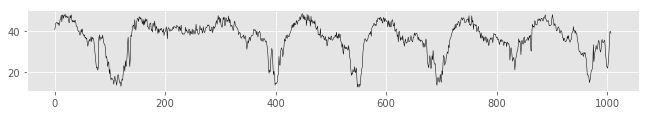

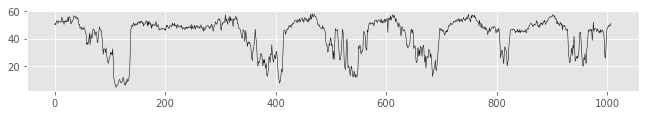

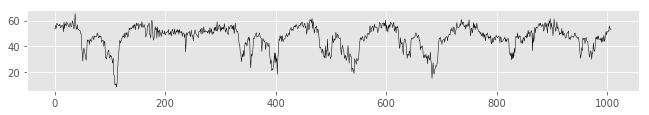

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
for i in range(3):
    fig = plt.figure(figsize = (10, 1.5))
    ax = fig.add_axes([0.10, 0.22, 0.85, 0.75])
    plt.plot(X[:, i], color = "black", linewidth = 0.5)
    plt.show()

Figure 1. Three panels from top to bottom are traffic speed time series corresponding to different road segments. Time interval of traffic measurements is 10 minutes, in other words, the curve visulaized in each panel includes 1008 data points ($144\times 7=1008$, 144 observations per day).

In [105]:
import time
start = time.time()

time_lags = np.array([1, 2, 144, 145, 146])#np.arange(1, 144 + 1)
R = X.shape[1]
d = time_lags.shape[0]

maxiter = np.array([200, 100])
pred_steps = 144 * 5
back_steps = 144 * 7
multi_steps = 144
start_step = X.shape[0] - pred_steps

A_tensor = 0.1 * np.random.rand(R, R, d)
mat_hat = np.zeros((pred_steps, R))
for t in range(int(pred_steps/multi_steps)):
    if t == 0:
        X0, A = bvar(X[0 : t * multi_steps + start_step, :], A_tensor, time_lags, multi_steps, maxiter)
        A_tensor = A.copy()
    else:
        X0, A = bvar(X[t * multi_steps + start_step - back_steps : t * multi_steps + start_step, :], 
                     A_tensor, time_lags, multi_steps, maxiter)
        A_tensor = A.copy()
    mat_hat[t * multi_steps : (t + 1) * multi_steps, :] = X0[X0.shape[0] - multi_steps :, :]
    
end = time.time()
print('Running time: %d seconds'%(end - start))

Running time: 1 seconds


In [107]:
mat = X[start_step : X.shape[0], :]
mat0 = X[X.shape[0] - pred_steps - 1 : X.shape[0] - 1, :]
pos = np.where(mat != 0)
print('MAPE: {}'.format(np.sum(np.abs(mat[pos] - mat_hat[pos])/mat[pos])/mat[pos].shape[0]))
print('RMSE: {}'.format(np.sqrt(np.sum((mat[pos] - mat_hat[pos]) ** 2)/mat[pos].shape[0])))

MAPE: 0.15225481818043057
RMSE: 6.46192119650863


### 3.1 Define a single-step rolling predictior

In [ ]:
# import time
# start = time.time()

# # from statsmodels.tsa.vector_ar import var_model
# from statsmodels.tsa.api import VAR, DynamicVAR

# R = X.shape[1]
# d = time_lags.shape[0]
# pred_steps = 144 * 5
# back_steps = 144 * 3
# multi_steps = 6
# start_step = X.shape[0] - pred_steps
# for t in range(int(pred_steps/multi_steps)):
#     model = VAR(X[0 : t * multi_steps + start_step, :])
#     results = model.fit(144)

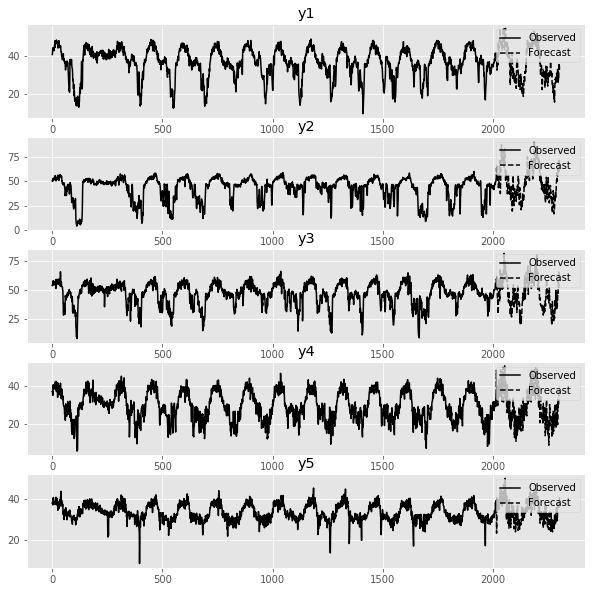

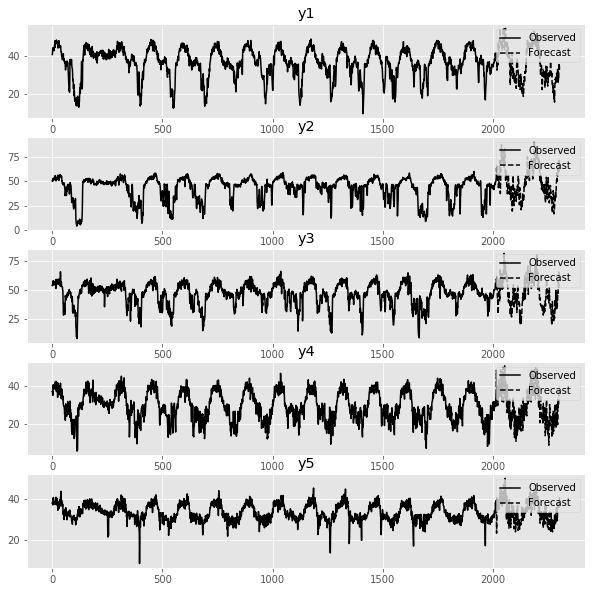

In [108]:
from statsmodels.tsa.api import VAR, DynamicVAR

model = VAR(X)
results = model.fit(288)
results.plot_forecast(288, alpha = 0.05, plot_stderr = False)

### 3.2 Analysis of prediction results

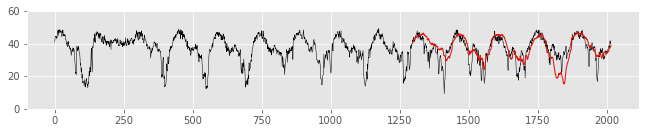

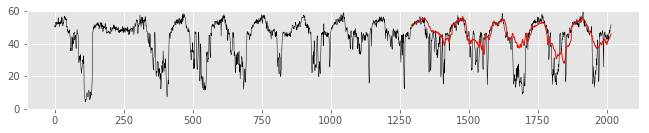

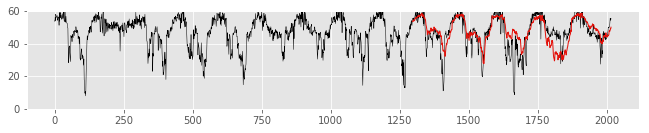

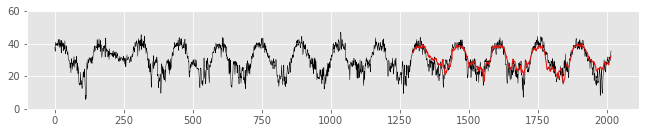

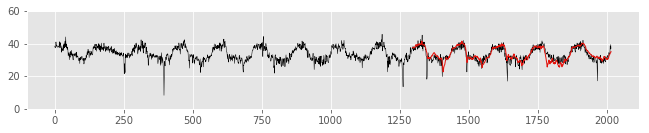

In [109]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
for i in range(5):
    fig = plt.figure(figsize = (10, 2))
    ax = fig.add_axes([0.13, 0.28, 0.85, 0.68])
    plt.plot(X[:, i], color = "black", linewidth = 0.5)
    plt.plot(list(range(X.shape[0] - pred_steps, X.shape[0])), mat_hat[:, i], color = "#e3120b", linewidth = 1.0)
    ax.set_ylim([0, 60])